## CIFAR100

/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_32/lora_alpha_16/fedlora_avg_flasc/dl_density_0.25/ul_density_0.25/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/
/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_8/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/


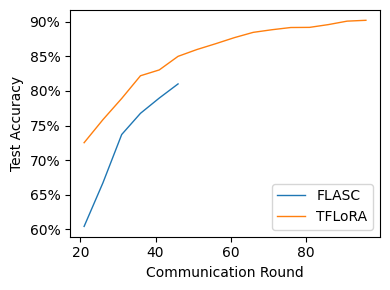

In [3]:
#general
from plot_functions import plot_figures_opts_attr
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.01, 32, 100
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 8, "lora_alpha": 16,  "fedlora_avg": "svd", "fedlora_uba": 1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,   "fedlora_uba": -1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_sb"] = {"non_iid": non_iid_alpha, "lora_rank": 160, "lora_alpha": 16,  "fedlora_avg": "sb", 'server_opt': 'adamw', 'client_opt': 'sgd', 'client_lr': client_lr, 'client_momentum': 0.0, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
#model_params["lora_sb"] = {"non_iid": non_iid_alpha, "lora_rank": 160, "lora_alpha": 16,  "fedlora_avg": "sb", 'server_opt': 'sgd', 'client_opt': 'adam', 'client_lr': client_lr, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_ffa"] = {"non_iid": non_iid_alpha, "lora_rank": 64, "lora_alpha": 16, "lora_freeze": "a",  "fedlora_uba": -1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fedex"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "fedex", 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': 0.01, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flora"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "flora", 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': 0.01, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flasc"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "flasc", "dl_density": 0.25, "ul_density": 0.25, 'server_opt': 'adamw', 'client_opt': "sgd", 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
#model_params["lora_flasc"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "flasc", "dl_density": 0.25, "ul_density": 0.25, 'server_opt': 'adamw', 'client_opt': "adamw", 'client_lr': 0.001, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params["lora_sb"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.0, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_sb"] = {'lr': 0.0001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_ffa"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_fedex"] = {'lr': 2.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_flora"] = {'lr': 2.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_flasc"] = {'lr': 0.001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts_attr([["lora_avg", "lora_flora", "lora_ffa", "lora_fedex",  "lora_flasc", "lora_svd"]], model_params, opt_params, ["test_acc"], start=4, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FedIT", "FLoRA", "FFA", "FedEX", "FLASC", "TFLoRA"]], save_dir=None, return_last=False) #"../plots/iclr25workshop/cifar_acc.pdf"
plot_figures_opts_attr([["lora_flasc", "lora_svd"]], model_params, opt_params, ["test_acc"], start=4, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FLASC", "TFLoRA"]], save_dir=None, return_last=False)


In [ ]:
results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_32/lora_alpha_16/fedlora_avg_flasc/dl_density_0.25/ul_density_0.25/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/train_graphs.pk

results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_32/lora_alpha_16/fedlora_avg_flasc/dl_density_0.25/ul_density_0.25/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_101/run_0/

/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_fedex/server_opt_sgd/client_opt_adam/client_lr_0.01/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_2.0/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/
/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.1/lora_rank_32/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/


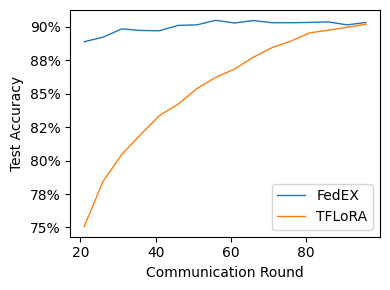

In [7]:
#general
from plot_functions import plot_figures_opts_attr
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.01, 32, 100
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.1

model_params = {}
model_params["lora_svd"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "svd", "fedlora_uba": 1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_avg"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,   "fedlora_uba": -1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_sb"] = {"non_iid": non_iid_alpha, "lora_rank": 160, "lora_alpha": 16,  "fedlora_avg": "sb", 'server_opt': 'adamw', 'client_opt': 'sgd', 'client_lr': client_lr, 'client_momentum': 0.0, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
#model_params["lora_sb"] = {"non_iid": non_iid_alpha, "lora_rank": 160, "lora_alpha": 16,  "fedlora_avg": "sb", 'server_opt': 'sgd', 'client_opt': 'adam', 'client_lr': client_lr, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_ffa"] = {"non_iid": non_iid_alpha, "lora_rank": 64, "lora_alpha": 16, "lora_freeze": "a",  "fedlora_uba": -1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fedex"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "fedex", 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': 0.01, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flora"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "flora", 'server_opt': 'sgd', 'client_opt': "adam", 'client_lr': 0.01, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flasc"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "flasc", "dl_density": 0.25, "ul_density": 0.25, 'server_opt': 'adamw', 'client_opt': "sgd", 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
#model_params["lora_flasc"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "flasc", "dl_density": 0.25, "ul_density": 0.25, 'server_opt': 'adamw', 'client_opt': "adamw", 'client_lr': 0.001, 'client_momentum': 0.9, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_svd"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_avg"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params["lora_sb"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.0, 'weight_decay':0.0, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_sb"] = {'lr': 0.0001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_ffa"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_fedex"] = {'lr': 2.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_flora"] = {'lr': 2.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_flasc"] = {'lr': 0.001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts_attr([["lora_avg", "lora_flora", "lora_ffa", "lora_fedex",  "lora_flasc", "lora_svd"]], model_params, opt_params, ["test_acc"], start=4, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FedIT", "FLoRA", "FFA", "FedEX", "FLASC", "TFLoRA"]], save_dir=None, return_last=False) #"../plots/iclr25workshop/cifar_acc.pdf"
plot_figures_opts_attr([["lora_fedex", "lora_svd"]], model_params, opt_params, ["test_acc"], start=4, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FedEX", "TFLoRA"]], save_dir=None, return_last=False)


/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_8/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/
/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_16/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adamw/client_opt_sgd/client_lr_0.001/client_momentum_0.0/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_32/epoch_100/run_0/
/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/cifar100/CrossEntropyLoss/federated/google/vit-base-patch16-224-in21k/non_iid_0.01/lora_rank_32/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adam

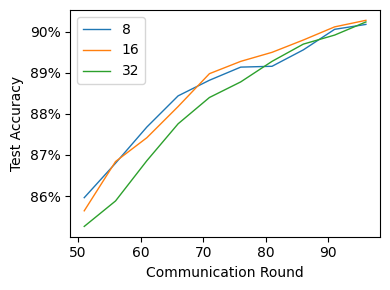

In [14]:
### effect of rank
#general
from plot_functions import plot_figures_opts_attr
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "cifar100", 'CrossEntropyLoss', "federated", 0.9, 0.01, 32, 100
model_name= "google/vit-base-patch16-224-in21k"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="sgd", 0.001, 0.0, 0.0, 100, 1, -1, 0.01

model_params = {}
model_params["lora_svd_8"] = {"non_iid": non_iid_alpha, "lora_rank": 8, "lora_alpha": 16,  "fedlora_avg": "svd", "fedlora_uba": 1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_16"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,  "fedlora_avg": "svd", "fedlora_uba": 1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_32"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16,  "fedlora_avg": "svd", "fedlora_uba": 1.0, 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}

opt_params = {}
opt_params["lora_svd_8"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_svd_16"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_svd_32"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts_attr([["lora_avg", "lora_flora", "lora_ffa", "lora_fedex",  "lora_flasc", "lora_svd"]], model_params, opt_params, ["test_acc"], start=4, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FedIT", "FLoRA", "FFA", "FedEX", "FLASC", "TFLoRA"]], save_dir=None, return_last=False) #"../plots/iclr25workshop/cifar_acc.pdf"
plot_figures_opts_attr([["lora_svd_8", "lora_svd_16", "lora_svd_32"]], model_params, opt_params, ["test_acc"], start=10, end=20, alpha=1.0, linewidth=1.0, titles=[""], legends=[["8", "16", "32"]], save_dir=None, return_last=False)


## 20NewsGroup

/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_16/lora_alpha_16/fedlora_avg_fedex/server_opt_adamw/client_opt_adamw/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_1.0/moment_0.9/wd_0.01/batch_size_12/epoch_200/run_0/
/projects/illinois/eng/cs/arindamb/lucmon/mlopt/results/20newsgroups/CrossEntropyLoss/federated/gpt2/non_iid_0.1/lora_rank_32/lora_alpha_16/fedlora_avg_svd/fedlora_uba_1.0/server_opt_adamw/client_opt_adamw/client_lr_0.001/client_momentum_0.9/client_weight_decay_0.0/client_num_100/client_epoch_1/sketch_size_-1/lr_0.001/moment_0.9/wd_0.01/batch_size_12/epoch_200/run_0/


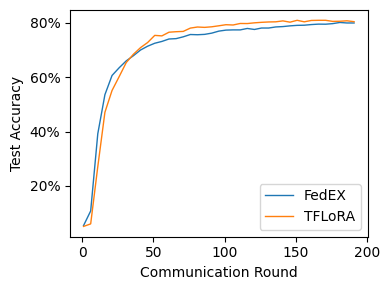

In [9]:
# non_iid_alpha
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.001, "20newsgroups", 'CrossEntropyLoss', "federated", 0.9, 0.01, 12, 200
model_name= "gpt2"
client_opt, client_lr, client_momentum, client_weight_decay, client_num, client_epoch, sketch_size, non_iid_alpha  ="adamw", 0.001, 0.9, 0.0, 100, 1, -1, 0.1

model_params = {}
non_iid_alpha = 0.1
model_params["lora_avg_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,"fedlora_uba": "-1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_ffa_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16, "lora_freeze": "a","fedlora_uba": "-1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16, "fedlora_avg": "svd", "fedlora_uba": "1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fedex_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "fedex",  'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flora_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "flora",  'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["flasc_0.1"] = {"non_iid": non_iid_alpha, "lora_rank": 64, "lora_alpha": 16, "fedlora_avg": "flasc", "dl_density":0.25,"ul_density":0.25, 'server_opt': 'adamw', 'client_opt': "sgd", 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
non_iid_alpha = 0.01
model_params["lora_avg_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16,"fedlora_uba": "-1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_ffa_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 32, "lora_alpha": 16, "lora_freeze": "a", "fedlora_uba": "-1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_svd_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "svd", "fedlora_uba": "1.0", 'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_fedex_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "fedex",  'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["lora_flora_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 16, "lora_alpha": 16, "fedlora_avg": "flora",  'server_opt': 'adamw', 'client_opt': client_opt, 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}
model_params["flasc_0.01"] = {"non_iid": non_iid_alpha, "lora_rank": 64, "lora_alpha": 16, "fedlora_avg": "flasc", "dl_density":0.25,"ul_density":0.25, 'server_opt': 'adamw', 'client_opt': "sgd", 'client_lr': client_lr, 'client_momentum': client_momentum, "client_weight_decay": client_weight_decay, "client_num": client_num, 'client_epoch': client_epoch, "sketch_size": sketch_size}


opt_params = {}
opt_params["lora_avg_0.1"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_svd_0.1"] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_ffa_0.1"] = opt_params["lora_ffa_0.01"] = opt_params["lora_avg_0.01"] = opt_params["lora_svd_0.01"] = opt_params["lora_svd_0.1"]
opt_params["lora_flora_0.1"] = {'lr': 1.0, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["lora_fedex_0.01"]  = opt_params["lora_fedex_0.1"] = opt_params["lora_flora_0.01"] = opt_params["lora_flora_0.1"]
opt_params["flasc_0.01"] = {'lr': 0.001, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':opt_name, 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params["flasc_0.1"] = opt_params["flasc_0.01"]

plot_figures_opts_attr([["lora_fedex_0.1", "lora_svd_0.1", ]], model_params, opt_params, ["test_acc"], start=0, end=-1, alpha=1.0, linewidth=1.0, titles=[""], legends=[["FedEX", "TFLoRA"]], save_dir=None, return_last=False)
